# Finding Specific Elements

Extracting all the text is useful, but often you need specific pieces of information. `natural-pdf` lets you find elements using selectors, similar to CSS.

Let's find the "Site" and "Date" information from our `01-practice.pdf`:

In [1]:
#%pip install "natural-pdf[all]"

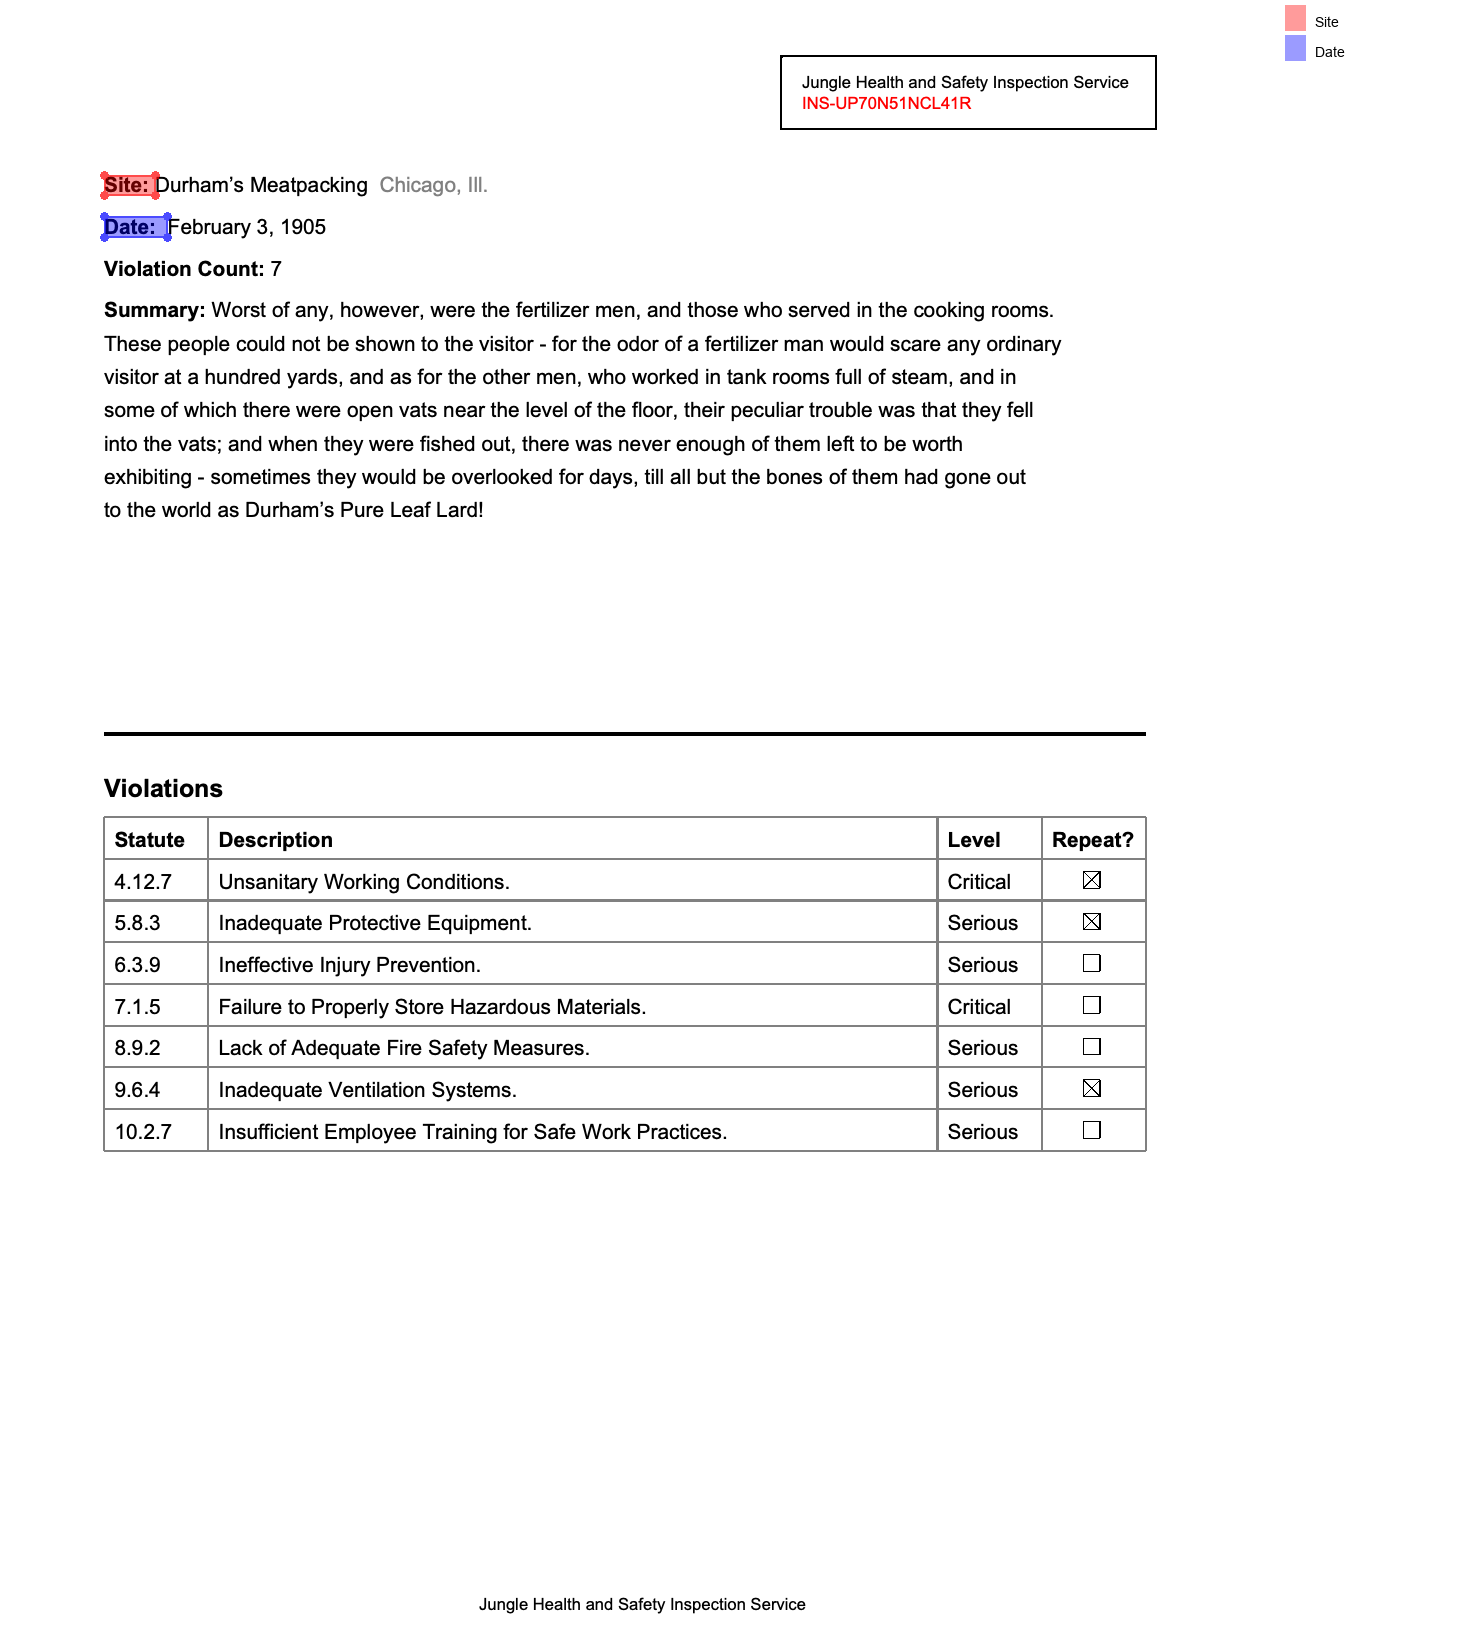

In [2]:
from natural_pdf import PDF

# Load a PDF
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")

# Get the first page (index 0)
page = pdf.pages[0]

# Find the text element containing "Site:"
# The ':contains()' pseudo-class looks for text content.
site_label = page.find('text:contains("Site:")')

# Find the text element containing "Date:"
date_label = page.find('text:contains("Date:")')

# Visualize the found elements
site_label.highlight(color="red", label="Site")
date_label.highlight(color="blue", label="Date")

# Access the text content directly
{
    "Site Label": site_label.text,
    "Date Label": date_label.text
}

# Display page with both highlights
page.to_image()

## Finding Elements by Color

You can find elements based on their color:

In [3]:
# Find text elements that are red
red_text = page.find('text[color~=red]')
print(f"Found red text: {red_text.text}")
red_text.show()

# Find elements with specific RGB colors
blue_text = page.find('text[color=rgb(0,0,255)]')

Found red text: INS-UP70N51NCL41R


## Finding Lines and Shapes

Find lines and rectangles based on their properties:

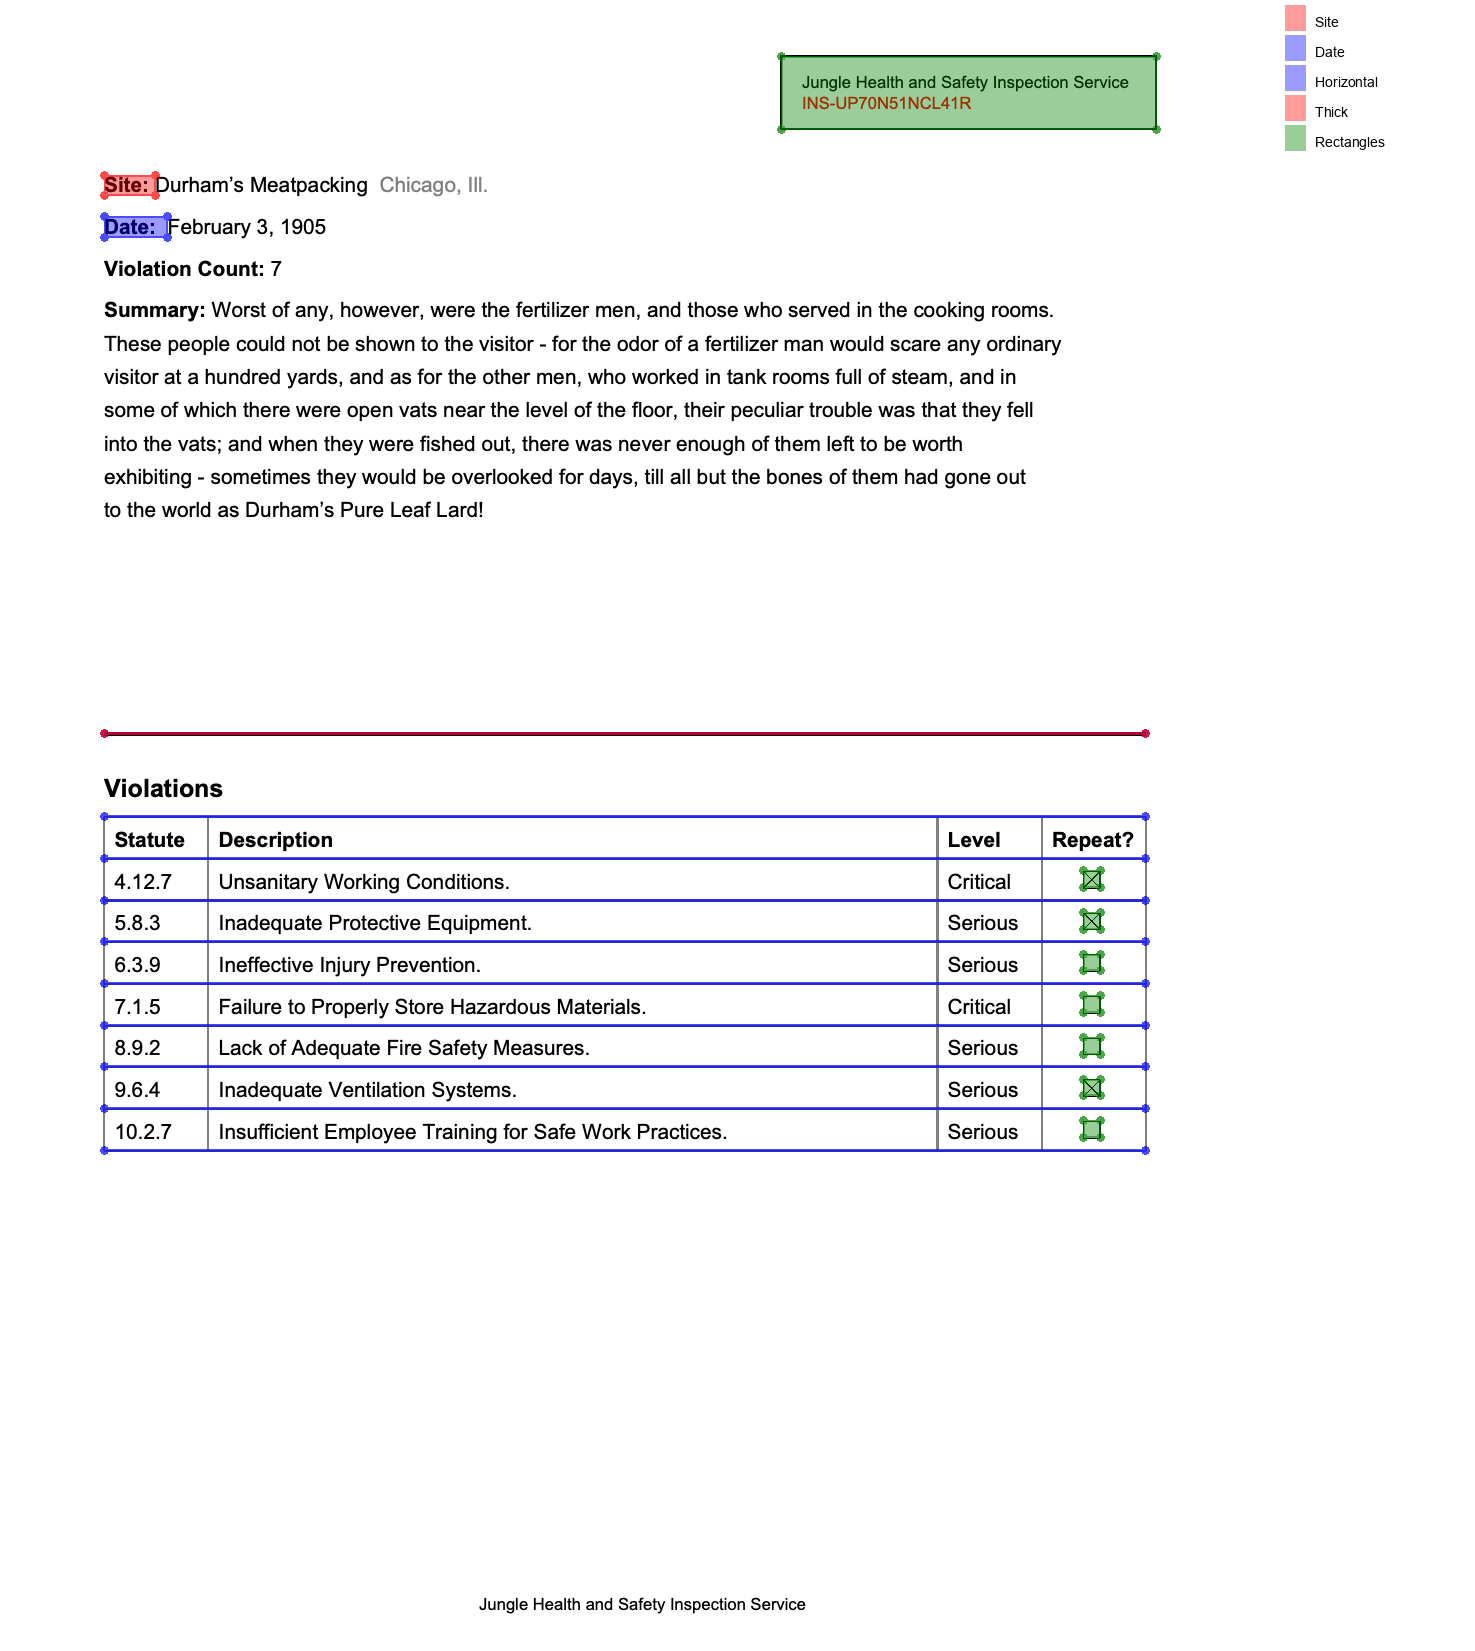

In [4]:
# Find horizontal lines
horizontal_lines = page.find_all('line:horizontal')

# Find thick lines (width >= 2)
thick_lines = page.find_all('line[width>=2]')

# Find rectangles
rectangles = page.find_all('rect')

# Visualize what we found
horizontal_lines.highlight(color="blue", label="Horizontal")
thick_lines.highlight(color="red", label="Thick")
rectangles.highlight(color="green", label="Rectangles")

# Display page with all shapes highlighted
page.to_image()

## Finding Elements by Font Properties

In [5]:
# Find text with specific font properties
bold_text = page.find_all('text:bold')
large_text = page.find_all('text[size>=12]')

# Find text with specific font names
helvetica_text = page.find_all('text[fontname=Helvetica]')

## Spatial Navigation

You can find elements based on their position relative to other elements:

In [6]:
# Find text above a specific element
above_text = page.find('line[width=2]').above().extract_text()

# Find text below a specific element
below_text = page.find('text:contains("Summary")').below().extract_text()

# Find text to the right of a specific element
nearby_text = page.find('text:contains("Site")').right(width=200).extract_text()

## Combining Selectors

You can combine multiple conditions to find exactly what you need:

In [7]:
# Find large, bold text that contains specific words
important_text = page.find_all('text[size>=12]:bold:contains("Critical")')

# Find red text inside a rectangle
highlighted_text = page.find('rect').find_all('text[color~=red]')

<div class="admonition note">
<p class="admonition-title">Handling Missing Elements</p>

    In these examples, we know certain elements exist in the PDF. In real-world scenarios, `page.find()` might not find a match and would return `None`. Production code should check for this:

    ```py
    site_label = page.find('text:contains("Site:")')
    if site_label:
        # Found it! Proceed...
        print(site_label.extract_text())
    else:
        # Didn't find it, handle appropriately...
        "Warning: 'Site:' label not found."
    ```
</div>

<div class="admonition tip">
<p class="admonition-title">Visual Debugging</p>

    When working with complex selectors, it's helpful to visualize what you're finding:

    ```py
    elements = page.find_all('text[color~=red]')
    elements.show()
    ```
</div> 